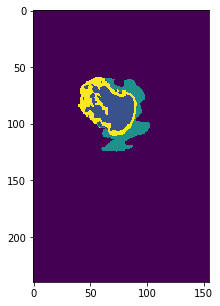

5818.0


In [4]:
import os 
from tqdm import tqdm
import nibabel as nib
import numpy as np
import glob
import matplotlib.pyplot as plt

class dataset_preprocessing_class():

    BASE_PATH = '/mnt/md0/MICCAI_BRATS2020'

    def create_dataset(self):

        train_gz = os.path.join(self.BASE_PATH, 'MICCAI_BraTS2020_TrainingData')
        test_gz = os.path.join(self.BASE_PATH, 'MICCAI_BraTS2020_ValidationData')

        Dataset_PATH = os.path.join(self.BASE_PATH, 'Dataset')

        if(not os.path.exists(Dataset_PATH)):
            os.mkdir(Dataset_PATH)

        train_path = os.path.join(Dataset_PATH, 'train')
        test_path = os.path.join(Dataset_PATH, 'test')

        if(not os.path.exists(train_path)):
            os.mkdir(train_path)
        if(not os.path.exists(test_path)):
            os.mkdir(test_path)

        # for person in tqdm(os.listdir(train_gz)):
        #     person_dir = os.path.join(train_gz, person)
        for person in tqdm(os.listdir(test_gz)):
            person_dir = os.path.join(test_gz, person)
            if(not os.path.isdir(person_dir)):
                continue
            flair_image_dir = os.path.join(person_dir, '*flair*')
            t1_image_dir = os.path.join(person_dir, '*t1*')
            t1ce_image_dir = os.path.join(person_dir, '*t1ce*')
            t2_image_dir = os.path.join(person_dir, '*t2*')
            # mask_dir = os.path.join(person_dir, '*seg*')

            flair_image_dir = glob.glob(flair_image_dir, recursive=True)
            flair_image_dir = flair_image_dir[0]
            t1_image_dir = glob.glob(t1_image_dir, recursive=True)
            t1_image_dir = t1_image_dir[0]
            t1ce_image_dir = glob.glob(t1ce_image_dir, recursive=True)
            t1ce_image_dir = t1ce_image_dir[0]
            t2_image_dir = glob.glob(t2_image_dir, recursive=True)
            t2_image_dir = t2_image_dir[0]
            # mask_dir = glob.glob(mask_dir, recursive=True)
            # mask_dir = mask_dir[0]
            

            flair_image = nib.load(flair_image_dir)
            t1_image = nib.load(t1_image_dir)
            t1ce_image = nib.load(t1ce_image_dir)
            t2_image = nib.load(t2_image_dir) # image should be normalized
            # mask = nib.load(mask_dir) # range from 0 to 4

            # image_saved_path = os.path.join(train_path,person)
            image_saved_path = os.path.join(test_path,person)
            if(not os.path.exists(image_saved_path)):
                os.mkdir(image_saved_path)

            np.save(image_saved_path+'/flair',np.array(flair_image.get_fdata()).astype('float32'))
            np.save(image_saved_path+'/t1',np.array(t1_image.get_fdata()).astype('float32'))
            np.save(image_saved_path+'/t1ce',np.array(t1ce_image.get_fdata()).astype('float32'))
            np.save(image_saved_path+'/t2',np.array(t2_image.get_fdata()).astype('float32'))
            # np.save(image_saved_path+'/mask',np.array(mask.get_fdata()).astype('float32'))

    def present_image(self, image_dir):
        flair_image_dir = os.path.join(image_dir, 'flair.npy')
        t1_image_dir = os.path.join(image_dir, 't1.npy')
        t1ce_image_dir = os.path.join(image_dir, 't1ce.npy')
        t2_image_dir = os.path.join(image_dir, 't2.npy')
        # mask_dir = os.path.join(image_dir, 'mask.npy')

        flair_image = np.load(flair_image_dir)
        t1_image = np.load(t1_image_dir)
        t1ce_image = np.load(t1ce_image_dir)
        t2_image = np.load(t2_image_dir)
        # mask = np.load(mask_dir)

        plt.figure(figsize=(10,10))
        plt.subplot(231)
        plt.imshow(flair_image[:,:,int(flair_image.shape[2]/2)])
        plt.subplot(232)
        plt.imshow(t1_image[:,:,int(t1_image.shape[2]/2)])
        plt.subplot(233)
        plt.imshow(t1ce_image[:,:,int(t1ce_image.shape[2]/2)])
        plt.subplot(234)
        plt.imshow(t2_image[:,:,int(t2_image.shape[2]/2)])
        # plt.subplot(235)
        # plt.imshow(mask[:,:,int(mask.shape[2]/2)])
        
        plt.figure(figsize=(10,10))
        plt.subplot(231)
        plt.imshow(flair_image[:,int(flair_image.shape[1]/2),:])
        plt.subplot(232)
        plt.imshow(t1_image[:,int(t1_image.shape[1]/2),:])
        plt.subplot(233)
        plt.imshow(t1ce_image[:,int(t1ce_image.shape[1]/2),:])
        plt.subplot(234)
        plt.imshow(t2_image[:,int(t2_image.shape[1]/2),:])

        plt.figure(figsize=(10,10))
        plt.subplot(231)
        plt.imshow(flair_image[int(flair_image.shape[0]/2),:,:])
        plt.subplot(232)
        plt.imshow(t1_image[int(t1_image.shape[0]/2),:,:])
        plt.subplot(233)
        plt.imshow(t1ce_image[int(t1ce_image.shape[0]/2),:,:])
        plt.subplot(234)
        plt.imshow(t2_image[int(t2_image.shape[0]/2),:,:])

        # plt.savefig('../data_visualization_demo/present_image.png')
#         plt.savefig('../data_visualization_demo/present_image_without_label.png')
        plt.show()

        print("length, width, slices")
        print("flair_image_shape: ", flair_image.shape)
        print("t1_image_shape: ", t1_image.shape)
        print("t1ce_image_shape: ", t1ce_image.shape)
        print("t2_image_shape: ", t2_image.shape)
        
    def get_label_from_mask(self, image_dir):
        mask_dir = os.path.join(image_dir, 'mask.npy')

        mask = np.load(mask_dir)
        
        label = np.sum(mask[:,int(mask.shape[1]/2),:])
#         label = np.sum(mask[:,0,:])
    
        plt.figure(figsize=(5,5))
        plt.subplot(111)
#         plt.imshow(mask[:,0,:])
        plt.imshow(mask[:,int(mask.shape[1]/2),:])
        plt.show()
        
        print(label)

if __name__ == "__main__":
    dataset_preprocessing_instance = dataset_preprocessing_class()
    # dataset_preprocessing_instance.create_dataset()
#     dataset_preprocessing_instance.present_image(os.path.join(dataset_preprocessing_instance.BASE_PATH, 'Dataset/train/BraTS20_Training_124'))
    dataset_preprocessing_instance.get_label_from_mask(os.path.join(dataset_preprocessing_instance.BASE_PATH, 'Dataset/train/BraTS20_Training_124'))

315.0
0.0


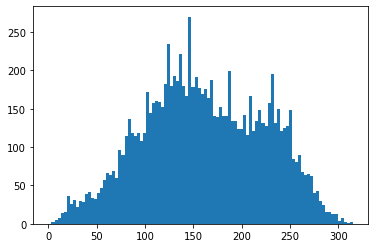

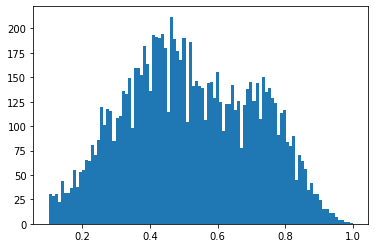

(240, 155)


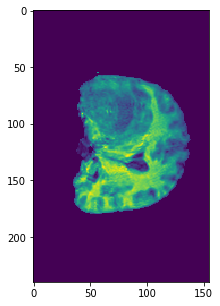

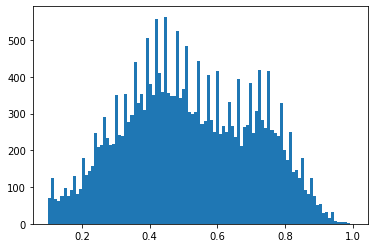

(256, 256)


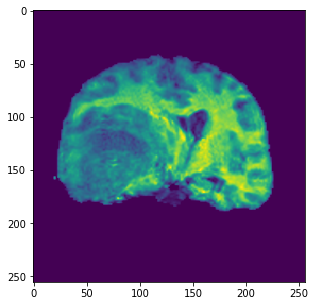

(256, 256, 3)


In [31]:
import numpy
from PIL import Image

def mask_histogram_analysis(image_dir):
    t1_image_dir = os.path.join(image_dir, 't1.npy')
    t1_image = np.load(t1_image_dir)
    t1_image_slice = t1_image[:,int(t1_image.shape[1]/2),:]
    image_array = numpy.asarray(t1_image_slice)
    image_array_copy = numpy.copy(image_array)

    flattened_image = image_array_copy.flatten()

    print(max(flattened_image))
    print(min(flattened_image))

    plt.hist(image_array_copy.ravel(),100,[0.1,max(flattened_image)]) # too many zeros
#     plt.savefig('pixel_value_histogram_analysis_0.png')
    plt.show()
    
    new_image_array = image_array_copy / max(flattened_image)
    
    plt.hist(new_image_array.ravel(),100,[0.1,1]) # too many zeros
    plt.show()
    
    print(new_image_array.shape)
    
    plt.figure(figsize=(5,5))
    plt.subplot(111)
    plt.imshow(new_image_array)
    plt.show()
    
    new_image_array_rotate = Image.fromarray(numpy.uint8(new_image_array * 255))
    new_image_array_rotate = new_image_array_rotate.crop((0, 30, 155, 210))
    new_image_array_rotate = new_image_array_rotate.rotate(90)
    new_image_array_rotate = new_image_array_rotate.resize((256,256))
    new_image_array_rotate = np.array(new_image_array_rotate) / 255.
    
    plt.hist(new_image_array_rotate.ravel(),100,[0.1,1]) # too many zeros
    plt.show()
    
    print(new_image_array_rotate.shape)
    
    plt.figure(figsize=(5,5))
    plt.subplot(111)
    plt.imshow(new_image_array_rotate)
    plt.show()
    
    new_image_array_rotate = np.expand_dims(new_image_array_rotate, axis=-1)
    saved_image = np.concatenate((new_image_array_rotate,new_image_array_rotate,new_image_array_rotate), axis=-1)
    
    print(saved_image.shape)
    
    im = Image.fromarray(numpy.uint8(saved_image * 255))
    im.save("img_demo.png")

mask_histogram_analysis(os.path.join(dataset_preprocessing_instance.BASE_PATH, 'Dataset/train/BraTS20_Training_124'))

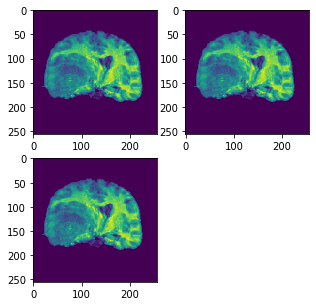

In [8]:
from PIL import Image

im = Image.open("img_demo.png")

im_array = np.array(im)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(im_array[:,:,0])
plt.subplot(222)
plt.imshow(im_array[:,:,1])
plt.subplot(223)
plt.imshow(im_array[:,:,2])
plt.show()